# Aromatic size distribution

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as mp
import numpy as np
from scipy.stats import norm
from scipy.stats import pareto
from scipy.integrate import simps
import seaborn as sns
from scipy.optimize import minimize
from scipy.optimize import fmin_slsqp

### PAH BPCA yields

In [2]:
B2CA = np.array([1.0, 0.667, 0.0, 0.714, 0.667, 0.0, 0.5, 0.5, 0.4, 0.5, 0.0, 0.0, 0.2, 0.0, 0.0,0.0,0.0,0.0,0.0,0.0]).T
B3CA = np.array([0.0, 0.0, 1.0, 0.0, 0.33, 0.5, 0.0, 0.0, 0.2, 0.0, 0.0, 0.80, 0.2, 0.333, 0.0, 0.0,0.0,0.08,0.0,0.0]).T
B4CA = np.array([0.0, 0.333, 0.0, 0.286, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.857, 0.0, 0.4, 0.50, 0.429, 0.316,0.250,0.080,0.2, 0.419]).T
B5CA = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.2, 0.0, 0.286, 0.316,0.33,0.480,0.333,0.0]).T
B6CA = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.143, 0.2, 0.0, 0.167, 0.286, 0.368,0.417,0.360,0.467,0.581]).T

### Total number of carbons per PAH

In [3]:
t = np.array([10, 13, 13, 14, 14, 16, 18, 17, 20, 17, 24, 20, 20, 22, 42, 54, 66, 70, 80, 84]).T

### Total number of hydrogen per PAH

In [4]:
h=np.array([8, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 16, 18, 20, 22, 22, 24]).T

### Experimental BPCA yields for the biochar sample

In [5]:
B2CAex = float(input("Enter the value for B2CA: "))
B3CAex = float(input("Enter the value for B3CA: "))
B4CAex = float(input("Enter the value for B4CA: "))
B5CAex = float(input("Enter the value for B5CA: "))
B6CAex = float(input("Enter the value for B6CA: "))

Enter the value for B2CA: 0
Enter the value for B3CA: 0.0468
Enter the value for B4CA: 0.3110
Enter the value for B5CA: 0.3445
Enter the value for B6CA: 0.2977


In [6]:
H_C=float(input("Enter the value for H/C ratio molar: "))

Enter the value for H/C ratio molar: 0.512


In [7]:
Biochar_Temp=float(input("Enter the temperature of pyrolysis in °C: "))

Enter the temperature of pyrolysis in °C: 500


In [8]:
if Biochar_Temp == 400:
    m = 2.6
elif Biochar_Temp == 500:
    m = 2
elif Biochar_Temp == 600:
    m = 1.6
elif Biochar_Temp == 700:
    m = 0.5
else:
    m = 0  # You may want to specify a default value in case Biochar_Temp doesn't match any of the above conditions

In [9]:
if Biochar_Temp == 400:
    v = 0.25
elif Biochar_Temp == 500:
    v = 0.13
elif Biochar_Temp == 600:
    v = 0.06
elif Biochar_Temp == 700:
    v = 0.07
else:
    v = 0  # You may want to specify a default value in case Biochar_Temp doesn't match any of the above conditions

## Create a Probability Density Distribution

Obtain the average cluster size ( μ ) using equation 18 presented in this paper:
https://pubs.acs.org/doi/10.1021/ef00014a012

In [10]:
mu = float(input("Enter the average cluster size (number of carbons): "))

Enter the average cluster size (number of carbons): 24


In [11]:
# Normalize the variables
carbons = t.T
sig = np.std(carbons)

carbons_centered = []

for i in range(len(carbons)):
    carbons_centeredval=(carbons[i]-mu)/sig
    carbons_centered.append(carbons_centeredval)

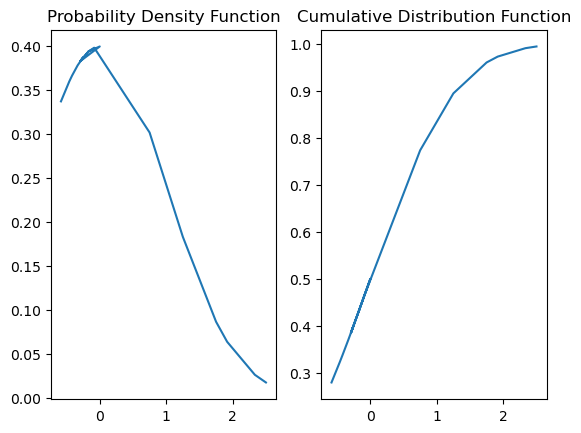

In [12]:
# Variables
carbons = t.T

# Probability Density Function
pdf = norm.pdf(carbons_centered, loc = 0 , scale = 1)
pdf = np.clip(pdf, 0, None)  # Clip PDF values to be non-negative


# Cumulative Distribution Function
cum=norm.cdf(carbons_centered, 0, 1)
cum = np.clip(cum, 0, 1)  # Clip CDF values between 0 and 1

# Plot the normalized Gaussian distribution
mp.subplot(121);
mp.plot(carbons_centered,pdf);
mp.title('Probability Density Function');
mp.subplot(122);
mp.plot(carbons_centered,cum);
mp.title('Cumulative Distribution Function');

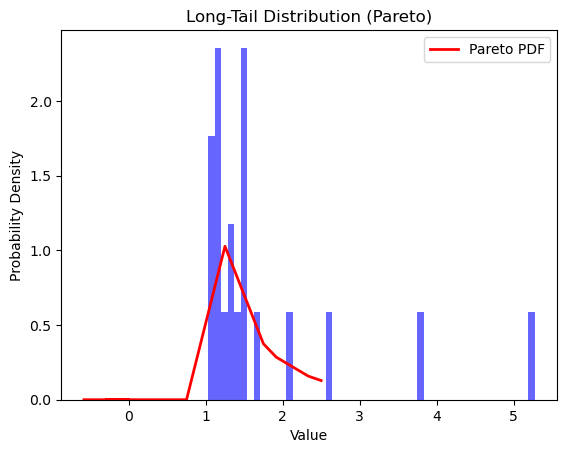

In [14]:
# Define the parameters for the Pareto distribution (shape and scale)
alpha = 2  # Shape parameter

# Generate random data following a Pareto distribution
data = pareto.rvs(alpha, loc=0, scale=1, size=len(carbons_centered))

# Create a histogram
mp.hist(data, bins=50, density=True, alpha=0.6, color='b')

# Plot the probability density function
pdf = pareto.pdf(carbons_centered, alpha, loc=0, scale=1)

mp.plot(carbons_centered, pdf, 'r-', lw=2, label='Pareto PDF')

mp.title("Long-Tail Distribution (Pareto)")
mp.xlabel("Value")
mp.ylabel("Probability Density")
mp.legend()
mp.show()

### Check the probability for each aromatic cluster in the distribution

In [15]:
# Check what number of carbons have more probability than others:
prob_check = float(input("Enter the probability that you want to check: "))
print("Number of carbons: ",round(norm.ppf(prob_check, mu, sig)))

Enter the probability that you want to check: 0.8
Number of carbons:  44


In [16]:
probability = []

for i in range(len(cum)):
    if i==0:
        probability_val=cum[0]
        probability.append(probability_val)
    else:
        probability_val=abs(cum[i]-cum[i-1])
        probability.append(probability_val)
        
totalprob=sum(probability)

In [17]:
probabilityCorrected = []

for i in range(len(probability)):
    probability_value=probability[i]/totalprob
    probabilityCorrected.append(probability_value)

newprob=sum(probabilityCorrected)
print(round(newprob))  

1


### Define the size of the model

In [18]:
SizeModel = float(input("How many atoms do you want in the model?: "))

How many atoms do you want in the model?: 10000


In [19]:
Frequency = []
TotalCarbons = []

for i in range(len(t)):  
    Frequency_value = round(((SizeModel/m)/t[i])*probabilityCorrected[i])
    Frequency.append(Frequency_value)
    TotalCarbons_value=Frequency[i]*t[i]
    TotalCarbons.append(TotalCarbons_value) 
    

print(Frequency)
print("Total number of Carbons in the model:",sum(TotalCarbons))

[112, 13, 0, 4, 0, 8, 7, 4, 10, 11, 19, 13, 0, 6, 29, 9, 4, 1, 1, 0]
Total number of Carbons in the model: 5020


## Ecuations to solve

In [20]:
# Equations to solve BPCA

def calculateB2CA(Frequency):
    B2CAval = []
    for i in range(len(Frequency)):
        B2CAval.append(B2CA[i] * Frequency[i])
    return B2CAval

def calculateB3CA(Frequency):
    B3CAval = []
    for i in range(len(Frequency)):
        B3CAval.append(B3CA[i] * Frequency[i])
    return B3CAval

def calculateB4CA(Frequency):
    B4CAval = []
    for i in range(len(Frequency)):
        B4CAval.append(B4CA[i] * Frequency[i])
    return B4CAval

def calculateB5CA(Frequency):
    B5CAval = []
    for i in range(len(Frequency)):
        B5CAval.append(B5CA[i] * Frequency[i])
    return B5CAval

def calculateB6CA(Frequency):
    B6CAval = []
    for i in range(len(Frequency)):
        B6CAval.append(B6CA[i] * Frequency[i])
    return B6CAval

def calculatetotalC(Frequency):
    TotalC = []
    for i in range(len(Frequency)):
        TotalC.append(Frequency[i]*t[i])
    return TotalC

TotalC=calculatetotalC(Frequency)
B2CAval=calculateB2CA(Frequency)
B3CAval=calculateB3CA(Frequency)
B4CAval=calculateB4CA(Frequency)
B5CAval=calculateB5CA(Frequency)
B6CAval=calculateB6CA(Frequency)

BPCA=sum(B2CAval) + sum(B3CAval) + sum(B4CAval) + sum(B5CAval) + sum(B6CAval)
print("Initial value for B2CA:",round(sum(B2CAval)/BPCA,5))
print("Initial value for B3CA:",round(sum(B3CAval)/BPCA,5))
print("Initial value for B4CA:",round(sum(B4CAval)/BPCA,5))
print("Initial value for B5CA:",round(sum(B5CAval)/BPCA,5))
print("Initial value for B6CA:",round(sum(B6CAval)/BPCA,5))
print("Total Carbon:",round(sum(TotalC)))

Initial value for B2CA: 0.55186
Initial value for B3CA: 0.07361
Initial value for B4CA: 0.22437
Initial value for B5CA: 0.0688
Initial value for B6CA: 0.08135
Total Carbon: 5020


In [21]:
# Define the objective function that returns the error for BPCA

def objective_function(b, t, h):
    
    B2CAval = calculateB2CA(b)
    B3CAval = calculateB3CA(b)
    B4CAval = calculateB4CA(b)
    B5CAval = calculateB5CA(b)
    B6CAval = calculateB6CA(b)
    
    BPCA = np.sum(B2CAval) + np.sum(B3CAval) + np.sum(B4CAval) + np.sum(B5CAval) + np.sum(B6CAval)
    
    error_B2CA = np.abs(sum(B2CAval) / BPCA - B2CAex)
    error_B3CA = np.abs(sum(B3CAval) / BPCA - B3CAex)
    error_B4CA = np.abs(sum(B4CAval) / BPCA - B4CAex)
    error_B5CA = np.abs(sum(B5CAval) / BPCA - B5CAex)
    error_B6CA = np.abs(sum(B6CAval) / BPCA - B6CAex)
 
    # Calculate the total error to minimize
    total_error = error_B2CA + error_B3CA + error_B6CA  + error_B5CA  

    return total_error

# Define constraints:  Bridgehead Carbon, Total Number of Carbons, and Cluster Size Average

def bridgeheadC_constraint(b, t, h):

    sum_t = np.sum(t * b)
    sum_h = np.sum(h * b)
    bridgeheadC = 1 - H_C
    Ratio = (sum_t - sum_h) / sum_t
    check = Ratio-bridgeheadC
    index_of_mean= np.where(t == mu)[0]
    Mean_av = ((b[index_of_mean[0]]*t[index_of_mean[0]])/sum_t)
    
    return [check - v, sum_t - (SizeModel/m), Mean_av-0.1014] 


# Initial guess for b (Frequency obtained from Gaussian Distribution)

initial_b = Frequency

t = np.array([10, 13, 13, 14, 14, 16, 18, 17, 20, 17, 24, 20, 20, 22, 42, 54, 66, 70, 80, 84]).T
h = np.array([8, 10, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 12, 12, 16, 18, 20, 22, 22, 24]).T

result = fmin_slsqp(objective_function, initial_b, f_eqcons=bridgeheadC_constraint, bounds=[(1, 0.03*SizeModel)] * len(initial_b), disp=False, full_output=True, epsilon=1.4901161193847656e-8, args=(t, h), iter=10000, acc=1e-10)

Wopt, fW, its, imode, smode = result

scalars = [float(round(x)) for x in Wopt]

if imode != 0:
    print("Optimization failed: " + smode)
else:
    print(scalars)
print("Final value for the total error:",fW)
print("Number of iterations:",its)
%store result

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 21.0, 2.0, 1.0, 1.0, 61.0, 1.0, 1.0, 20.0, 1.0, 1.0]
Final value for the total error: 0.1953095307133299
Number of iterations: 163
Stored 'result' (tuple)


## BPCA Distribution:

In [22]:
%store -r result
values=np.round(result[0]).astype(int)